# Data Preprocessing

## The Nature of the Dataset

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Display all columns
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
# Load Base.csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PyProjects/02_Advanced_Machine_Learning/Bank_Account_Fraud_Detection/Base.csv')
df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [36]:
# Remove "device_fraud_count" since it's 0 for all entries
print(df['device_fraud_count'].value_counts())
df = df.drop(['device_fraud_count'], axis=1)

0    1000000
Name: device_fraud_count, dtype: int64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [38]:
# Get information for each non-numerical column in the DataFrame
df.describe(include=['object', 'bool']).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [39]:
# Count of unique values in the fraud_bool column
fraud_counts = df['fraud_bool'].value_counts()
fraud_counts

0    988971
1     11029
Name: fraud_bool, dtype: int64

In [40]:
# Define custom color palette
my_palette = sns.color_palette('vlag')
sns.set_style("whitegrid")

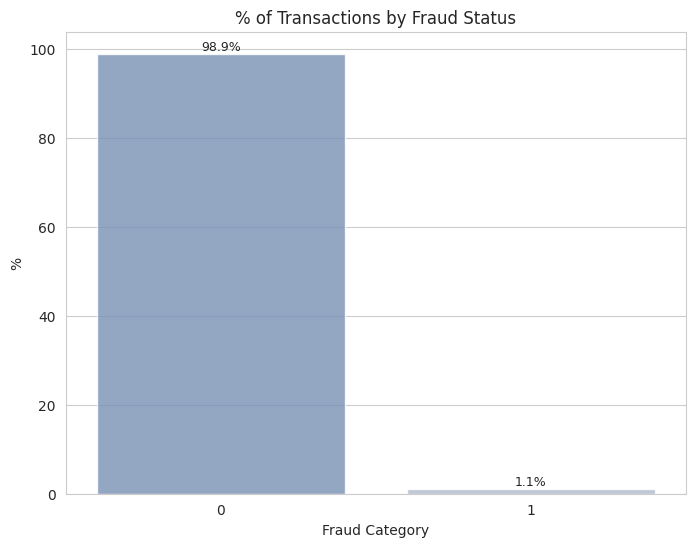

In [41]:
# Convert the counts to a DataFrame for plotting
fraud_counts_df = fraud_counts.reset_index()
fraud_counts_df.columns = ['Fraud Category', 'Count']

# Convert the counts to percentages
total_count = fraud_counts_df['Count'].sum()
fraud_counts_df['Percentage'] = (fraud_counts_df['Count'] / total_count) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Fraud Category', y='Percentage', palette=my_palette, data=fraud_counts_df, alpha=.8)

# Set the plot title and labels
plt.title('% of Transactions by Fraud Status')
plt.xlabel('Fraud Category')
plt.ylabel('%')

# Annotate each bar with the percentage
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  # x-coordinate of label
            p.get_height(),  # y-coordinate of label
            '{:1.1f}%'.format(p.get_height()),  # label text
            ha='center',
            va='bottom',
            fontsize=9)

# Show the plot
plt.show()

This is a highly imbalanced distribution, characterised by an extremely low prevalence of the positive class，where fraudulent transactions are rare compared to legitimate ones.

**Resampling Techniques:**
- Oversampling the minority class: increase the number of instances in the minority class by duplicating them or by synthesizing new instances using methods like SMOTE (Synthetic Minority Over-sampling Technique).
- Undersampling the majority class: Reduce the number of instances in the majority class to balance the class distribution. This can result in loss of potentially valuable data. - We won't chose this method.

**Selection of ML Models**
- Since fraud can be considered an anomaly, using specific algorithms designed for anomaly detection (like One-Class SVM) might be more effective than traditional classification methods.
- Using ensemble methods like Random Forests or Gradient Boosting can help as they tend to handle imbalance well.

**Use of appropriate evaluation metrics:**
- Metrics like accuracy can be misleading in imbalanced datasets. Precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) are more informative.Precision-Recall curves are especially useful when dealing with highly imbalanced datasets.

**Reasons to Resample:**
- **Improve Model Sensitivity to Minority Class:** Many machine learning algorithms assume a relatively balanced class distribution and might perform poorly on imbalanced data, especially in terms of sensitivity to the minority class.
- **Avoid Model Bias:** Without resampling, models might tend to overwhelmingly predict the majority class (non-fraud), as it's the path of least resistance to minimizing error.

**Reasons NOT to Resampl:**
- **Reflect Real-world Distribution:** In many fraud detection scenarios, the real-world data is indeed highly imbalanced. Models trained on resampled data might not perform as expected on real, imbalanced datasets.
- **Risk of Overfitting (with Oversampling)**: Techniques like SMOTE can lead to overfitting, especially if the synthetic samples do not accurately represent real fraud cases.
- **Loss of Information (with Undersampling)**: Reducing the size of the majority class can lead to the loss of potentially valuable information.

## Feature Engineering & Selection

### Missing Values

In [42]:
# Deal with the missing value
# List of features to check for missing values
missing_features = ['prev_address_months_count',
                    'current_address_months_count',
                    'bank_months_count',
                    'session_length_in_minutes',
                    'device_distinct_emails_8w']

# Intended_balcon_amount < 0 would also be regard as missing values
df['intended_balcon_amount'] = df['intended_balcon_amount'].apply(lambda x: np.nan if x < 0 else x)

# Replace -1 with NaN value
for feature in missing_features:
    df[feature] = df[feature].replace(-1, np.nan)

In [43]:
df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,NaN,88.0,50,0.020925,NaN,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24.0,0,500.0,0,INTERNET,3.888115,windows,0,1.0,7
1,1,0.9,0.296286,NaN,144.0,50,0.005418,NaN,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15.0,0,1500.0,0,INTERNET,31.798819,windows,0,1.0,7
2,1,0.9,0.044985,NaN,132.0,40,3.108549,NaN,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,NaN,0,200.0,0,INTERNET,4.728705,other,0,1.0,7
3,1,0.9,0.159511,NaN,22.0,50,0.019079,NaN,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31.0,1,200.0,0,INTERNET,2.047904,linux,0,1.0,7
4,1,0.9,0.596414,NaN,218.0,50,0.004441,NaN,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31.0,0,1500.0,0,INTERNET,3.775225,macintosh,1,1.0,7


In [44]:
df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount              742523
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

In [45]:
missing_features_2 = ['prev_address_months_count',
                      'current_address_months_count',
                      'bank_months_count',
                      'session_length_in_minutes',
                      'device_distinct_emails_8w',
                      'intended_balcon_amount']

# Initialize an empty DataFrame to hold the number of missing values for each feature
missing_vals = pd.DataFrame()
for feature in missing_features_2:
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()))
    missing_vals[feature] = missing_vals_col

missing_vals

,prev_address_months_count,current_address_months_count,bank_months_count,session_length_in_minutes,device_distinct_emails_8w,intended_balcon_amount
fraud_bool,,,,,,
0,702786,4240,249495,1997,355,732776
1,10134,14,4140,18,4,9747


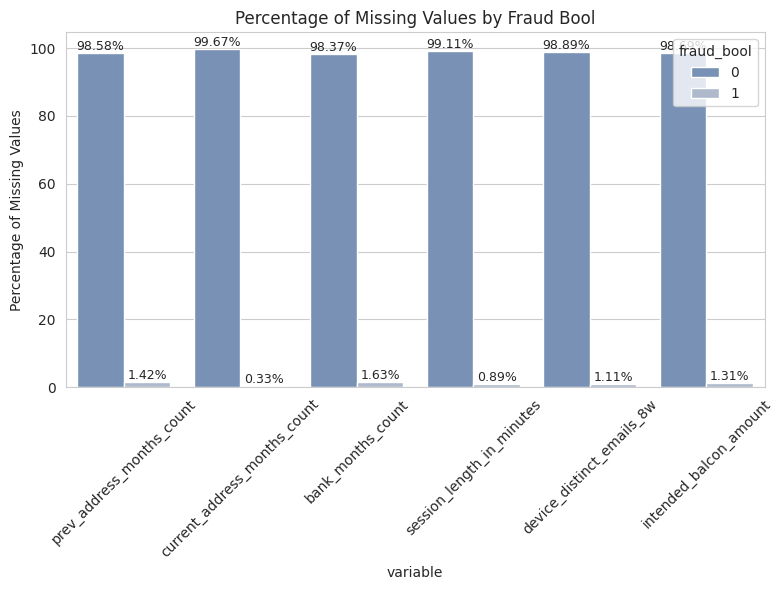

In [46]:
# Plot the percentage of missing value by fraud_bool in each column
missing_vals_percentage = missing_vals.apply(lambda x: x / x.sum() * 100)

# Reset the index to turn the DataFrame into a long-form DataFrame
missing_vals_long = missing_vals_percentage.reset_index().melt(id_vars='fraud_bool', var_name='variable', value_name='percentage')

# Plotting with Seaborn
# Your existing code for plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=missing_vals_long, x='variable', y='percentage', palette=my_palette, hue='fraud_bool')
plt.xticks(rotation=45)
plt.title('Percentage of Missing Values by Fraud Bool')
plt.ylabel('Percentage of Missing Values')

# Iterate over the bars and add text annotations
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  # x-coordinate of label
            p.get_height(),  # y-coordinate of label
            '{:1.2f}%'.format(p.get_height()),  # label text
            ha='center',
            va='bottom',
            fontsize=9)

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [47]:
# Drop NA value
missing_features_2 = ['prev_address_months_count',
                      'current_address_months_count',
                      'bank_months_count',
                      'session_length_in_minutes',
                      'device_distinct_emails_8w',
                      'intended_balcon_amount']

# We drop 'intended_balcon_amount' and 'prev_address_months_count' entirely
df_clean = df.drop(['intended_balcon_amount', 'prev_address_months_count'], axis = 1)

# Drop rows where any of the specified columns have NaN values
na_columns = ['session_length_in_minutes', 'device_distinct_emails_8w', 'current_address_months_count']
df_clean = df_clean.dropna(subset=na_columns)

# Fill in the mean value for 'bank_months_count'
mean_bank_months_count = df_clean['bank_months_count'].mean()
df_clean['bank_months_count'] = df_clean['bank_months_count'].fillna(mean_bank_months_count)

# Display cleaned df shape
df_clean.shape

(993607, 29)

In [ ]:
# Save df_clean
df_clean.to_csv('df_clean.csv', index=False)

### Distributions and Outliers

In [48]:
# Since we have already dealed with missing value, we load df_clean.csv as df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PyProjects/02_Advanced_Machine_Learning/Bank_Account_Fraud_Detection/df_clean.csv')
df.head(5)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,88.0,50,0.020925,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24.000000,0,500.0,0,INTERNET,3.888115,windows,0,1.0,7
1,1,0.9,0.296286,144.0,50,0.005418,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15.000000,0,1500.0,0,INTERNET,31.798819,windows,0,1.0,7
2,1,0.9,0.044985,132.0,40,3.108549,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,14.867085,0,200.0,0,INTERNET,4.728705,other,0,1.0,7
3,1,0.9,0.159511,22.0,50,0.019079,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31.000000,1,200.0,0,INTERNET,2.047904,linux,0,1.0,7
4,1,0.9,0.596414,218.0,50,0.004441,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31.000000,0,1500.0,0,INTERNET,3.775225,macintosh,1,1.0,7


In [49]:
# Create a list of numeric features in the DataFrame df
exclude_list = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
numeric_features = [x for x in df.columns if (x not in exclude_list)][1:] # We also need to exclude fraud_bool
print(numeric_features)

['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'month']


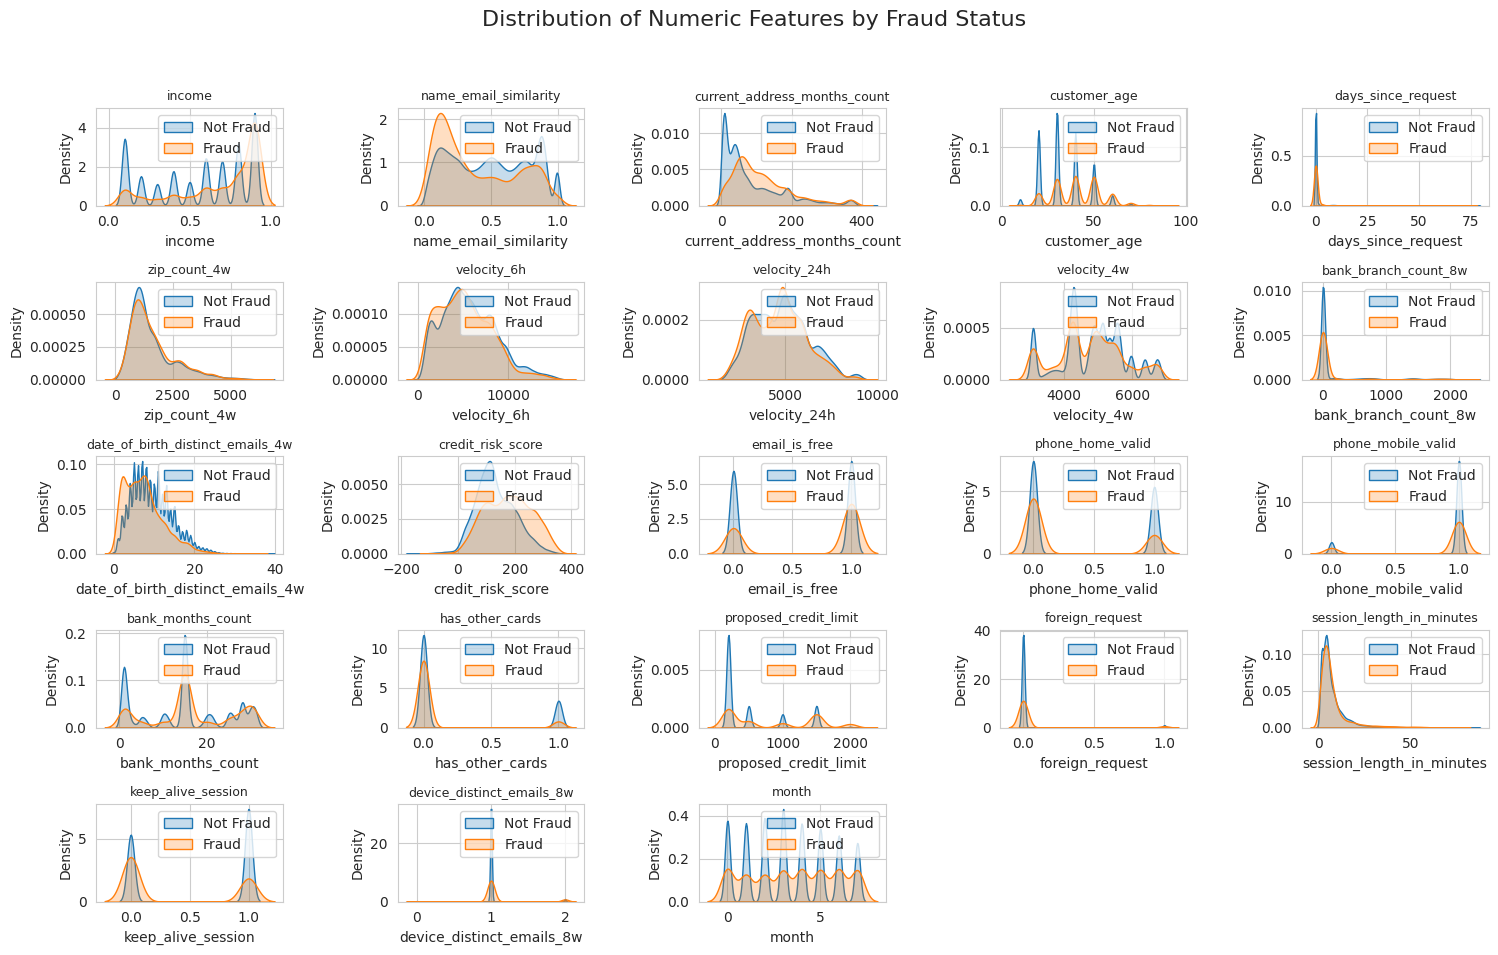

In [50]:
# Distribution of Numeric Features by Fraud Status
import math

# Determine the size of the grid
n_features = len(numeric_features)
ncols = 5
nrows = math.ceil(n_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 2*nrows))
fig.suptitle('Distribution of Numeric Features by Fraud Status', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=axes[i], label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=axes[i], label='Fraud')
    axes[i].set_title(feature, fontsize=9)
    axes[i].legend()

# Turn off axes for any unused subplots
for i in range(n_features, nrows*ncols):
    fig.delaxes(axes[i])

# Adjust layout
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

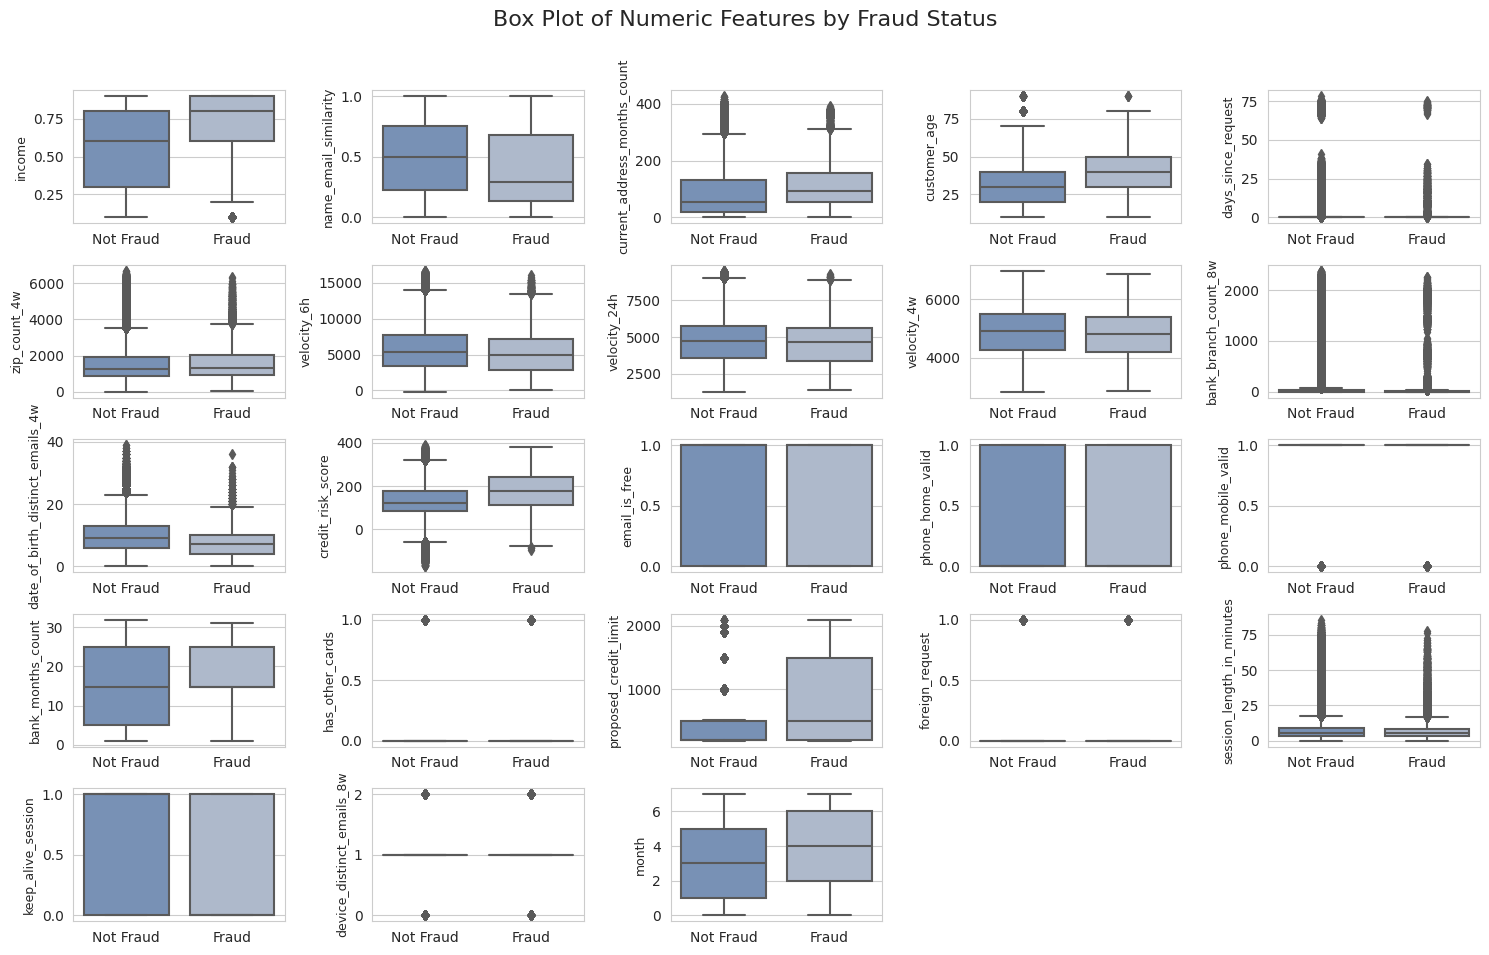

In [51]:
# Box Plot of Numeric Features by Fraud Status
# Determine the size of the grid
n_features = len(numeric_features)
ncols = 5
nrows = math.ceil(n_features / ncols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 2*nrows))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=axes[i], palette=my_palette)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature, fontsize=9)
    axes[i].set_xticklabels(['Not Fraud', 'Fraud'])

# Hide unused subplots if there are any
for j in range(i + 1, nrows * ncols):
    axes[j].axis('off')

# Adjust the layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### One-Hot Encoding and Scaling

In [52]:
# Get information for each non-numerical column in the DataFrame
df.describe(include=['object', 'bool']).transpose()

,count,unique,top,freq
payment_type,993607,5,AB,368115
employment_status,993607,7,CA,725305
housing_status,993607,7,BC,368343
source,993607,2,INTERNET,988252
device_os,993607,5,other,339809


**Categorical features:** payment_type, employment_status, housing_status, source, device_os

In [53]:
# Create a column with binary encoding for 'source': encode INTERNET as 1 and TELEAPP as 0
df['source'] = df['source'].map({'INTERNET': 1, 'TELEAPP': 0})

# We convert categorical variables into dummy variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['payment_type',
                                         'employment_status',
                                         'housing_status',
                                         'device_os'])

In [54]:
df_encoded.head(5)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,0.166828,88.0,50,0.020925,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24.000000,0,500.0,0,1,3.888115,0,1.0,7,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0.9,0.296286,144.0,50,0.005418,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15.000000,0,1500.0,0,1,31.798819,0,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0.9,0.044985,132.0,40,3.108549,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,14.867085,0,200.0,0,1,4.728705,0,1.0,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0.9,0.159511,22.0,50,0.019079,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31.000000,1,200.0,0,1,2.047904,0,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0.9,0.596414,218.0,50,0.004441,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31.000000,0,1500.0,0,1,3.775225,1,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [55]:
# Number of columns after encoding above categorical features
len(df_encoded.columns)

49

From the distribution plot and the box plot, we can conclude that:

- Income
- customer_age
- email_is_free
- phone_home_valid
- phone_mobile_valid
- has_other_cards
- foreign_request
- keep_alive_session
- device_distinct_email
- month

can also be regarded as categorical and **need not to be scaled.**

In [56]:
# These are the variables that need to be scaled
scalable_features = ['name_email_similarity',
                    'current_address_months_count',
                    'days_since_request',
                    'zip_count_4w',
                    'velocity_6h',
                    'velocity_24h',
                    'velocity_4w',
                    'bank_branch_count_8w',
                    'date_of_birth_distinct_emails_4w',
                    'credit_risk_score',
                    'bank_months_count',
                    'proposed_credit_limit',
                    'session_length_in_minutes']

In [57]:
# Scale the above variables
from sklearn.preprocessing import StandardScaler

# Create a copy of the original DataFrame to retain the original values
df_scaled = df_encoded.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric features and update the copy
df_scaled[scalable_features] = scaler.fit_transform(df_scaled[scalable_features])
df_scaled.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,-1.131225,0.011765,50,-0.185992,-0.800179,1.655654,-1.106207,-1.080405,-0.399472,-0.695634,0.773925,0,1,0,9.167084e-01,0,-0.033406,0,1,-0.457082,0,1.0,7,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0.9,-0.683485,0.645170,50,-0.188886,-1.200915,-1.705962,-1.419569,-1.884702,1.158426,-1.291591,1.835353,1,0,0,1.334122e-02,0,2.016575,0,1,3.019486,0,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0.9,-1.552624,0.509440,40,0.390135,-0.699746,-0.538157,-1.268972,-1.846310,-0.399472,0.893585,0.659176,1,0,1,3.566006e-16,0,-0.648400,0,1,-0.352378,0,1.0,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0.9,-1.156530,-0.734748,50,-0.186336,-0.759409,-0.734693,-0.483685,-1.995702,3.772305,-0.695634,-0.301847,1,0,1,1.619327e+00,1,-0.648400,0,1,-0.686299,0,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0.9,0.354526,1.482170,50,-0.189068,-0.679859,-0.215242,-1.380808,-1.924547,3.922228,-1.490243,2.351723,1,1,0,1.619327e+00,0,2.016575,0,1,-0.471143,1,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Save df_scaled to csv file
df_scaled.to_csv('df_scaled.csv', index=False)

**Resample First:**
- Argument: In fraud detection, some subtle patterns might only be visible in a balanced dataset. Resampling first (especially using techniques like SMOTE) might help in uncovering these patterns, which could be crucial for detecting fraud.
- Risk: Synthetic samples created by SMOTE or similar techniques might introduce noise or overemphasize rare characteristics, potentially leading to overfitting.

**Feature Selection First:**
- Argument: Performing feature selection on the original dataset can help to identify the most relevant features that are truly indicative of fraud, as they are in the real, imbalanced world.
- Risk: The selected features might be biased towards the majority class (legitimate transactions), potentially overlooking important indicators of fraud.

### Feature Selection

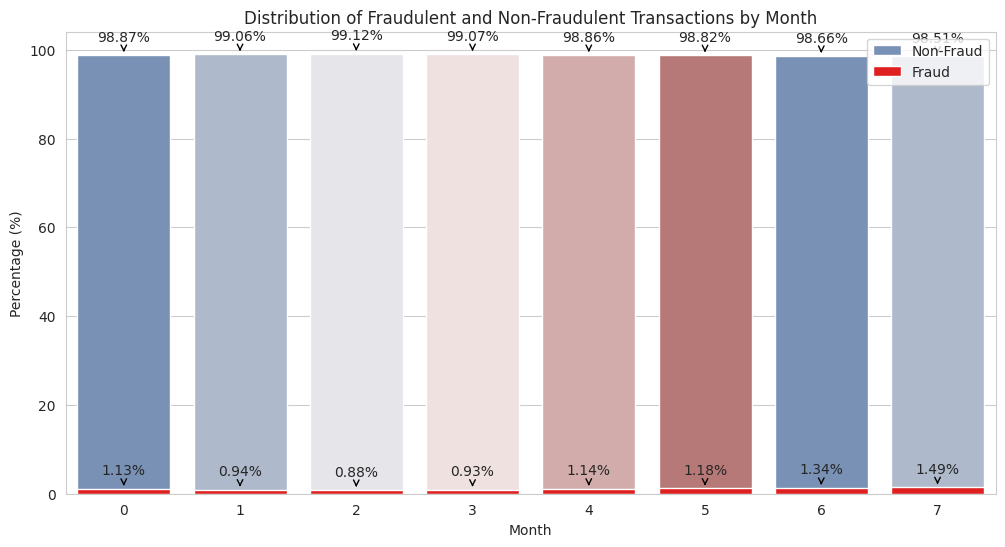

In [58]:
# First we need to split the whole dataset into training and testing
# We look at the distribution of fraud based on month
# Group by month and calculate the sum of fraud cases and the total count
fraud_distribution = df.groupby('month')['fraud_bool'].agg(['sum', 'count']).reset_index()

# Calculate the percentage of fraud and non-fraud cases
fraud_distribution['fraud_percent'] = 100 * fraud_distribution['sum'] / fraud_distribution['count']
fraud_distribution['non_fraud_percent'] = 100 - fraud_distribution['fraud_percent']

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the non-fraudulent transactions
non_fraud_bar = sns.barplot(x='month', y='non_fraud_percent', data=fraud_distribution, palette=my_palette, label='Non-Fraud')

# Plotting the fraudulent transactions on top of non-fraudulent
fraud_bar = sns.barplot(x='month', y='fraud_percent', data=fraud_distribution, color='red', label='Fraud')

plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.legend()

# Adding annotations with arrows for each bar
for bar in fraud_bar.patches:
    plt.annotate(
        f'{bar.get_height():.2f}%',  # The text (formatted to two decimal places)
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Point to annotate
        textcoords="offset points",  # Offset (in points) from the annotated point
        xytext=(0,10),  # The position (offset) of the text (10 points above the bar)
        ha='center',  # Horizontal alignment
        arrowprops=dict(arrowstyle="->", color='black')  # Arrow properties
    )

plt.show()

In [59]:
# Number of entries for each sub dataset
print(df_scaled['month'].between(0, 5).sum()) # Training set
print(df_scaled['month'].between(6, 7).sum()) # Testing set

790335
203272


Since the distribution of fraud is quite steady in each month, **we use month 0 to 5 as the training set, and month 6 to 7 as the testing set.**

In [60]:
# Split the data into training and testing sets
train_df = df_scaled[df_scaled['month'].between(0, 5)]
test_df = df_scaled[df_scaled['month'].between(6, 7)]

# Then drop the 'month' column from the dataset
train_df = train_df.drop(columns=['month'])
test_df = test_df.drop(columns=['month'])

In [61]:
# Display train_df
train_df.head(5)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
95805,1,0.8,-1.177629,0.204049,30,-0.189250,0.204147,-1.502083,-1.145384,0.233310,-0.401645,-0.496982,-0.416596,1,0,1,3.566006e-16,0,-0.648400,0,1,-0.454145,0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
95806,1,0.8,-0.178005,0.226670,40,-0.185954,-0.376572,1.701468,0.689709,-0.052278,-0.399472,-0.695634,1.950102,1,1,1,3.566006e-16,0,-0.648400,0,1,2.010287,0,2.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
95807,1,0.9,-0.572665,-0.090032,70,-0.188197,-0.724606,0.942470,0.772231,-0.020063,-0.399472,-1.490243,1.993133,1,0,1,3.566006e-16,0,3.041565,0,1,-0.592129,0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
95808,1,0.7,-1.591191,-0.666883,30,-0.189018,0.122608,0.114010,0.496985,-0.021358,-0.369053,2.681455,1.534137,1,0,1,1.318205e+00,0,0.991584,0,1,-0.285895,1,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
95809,1,0.9,-1.187201,0.871386,40,-0.187616,-0.099139,0.900560,0.108526,0.185409,-0.397299,-0.695634,2.638595,1,0,1,-9.904001e-01,0,2.016575,0,1,-0.227782,0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [62]:
# Display the column names of train_df
train_df_columns = [col for col in train_df.columns if col != 'fraud_bool']
print(train_df_columns)

['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


Use **Gradient Boosting** for feature selection in your dataset.

- **Feature Importance:** Gradient Boosting models inherently provide feature importance scores. These scores indicate how valuable each feature was in the construction of the boosted decision trees.

- **Robust to Irrelevant Features:** These models are generally robust to irrelevant features, but identifying the most important features can still improve model performance, especially in terms of training speed and avoiding overfitting.

- **Handling Imbalanced Data:** While Gradient Boosting doesn't directly address class imbalance, its focus on misclassified instances can be beneficial in imbalanced settings like fraud detection.

In [63]:
# Feature selection using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

# Separate features and target variable for training data
X_train = train_df.drop(columns=['fraud_bool'])
y_train = train_df['fraud_bool']

# Initialize and train the classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Get feature importances
importances = gb_classifier.feature_importances_

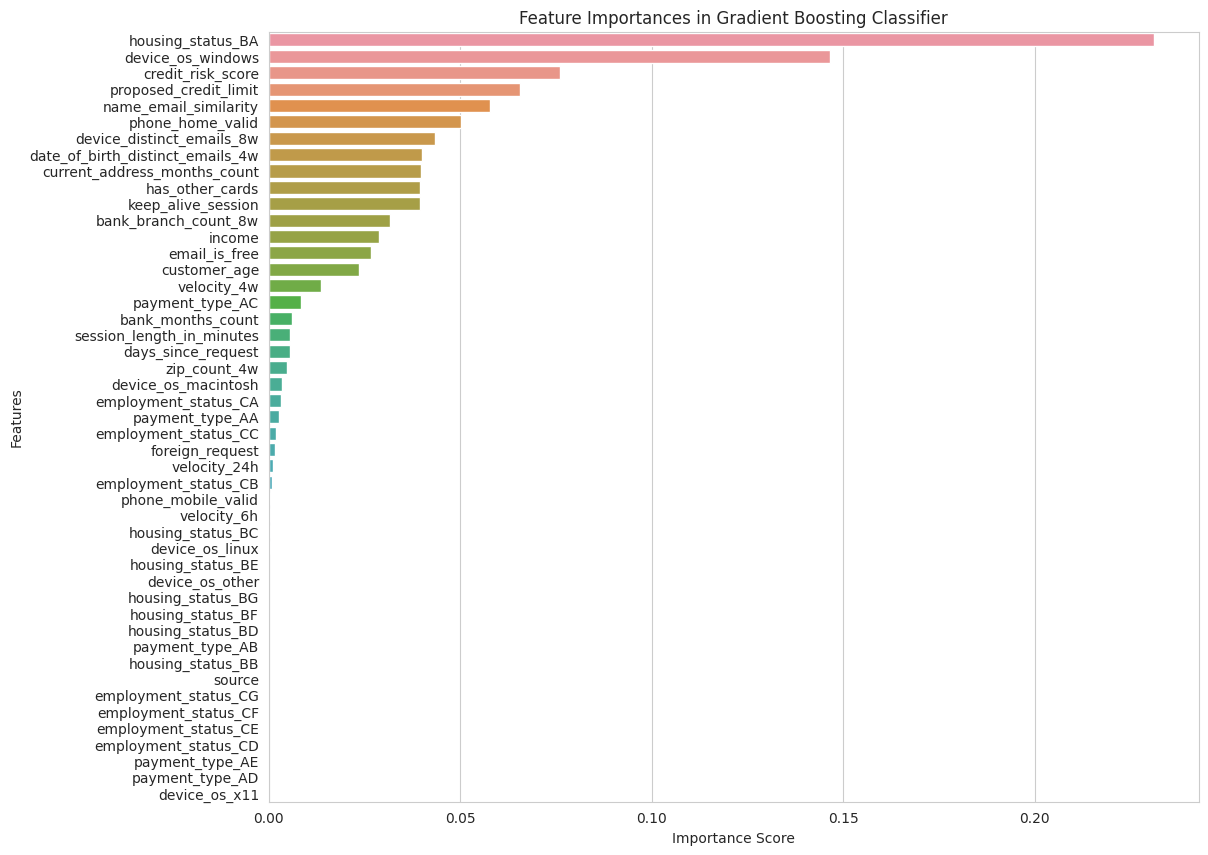

In [64]:
# Visualize the importance of features
# Generate a dataframe to store Importance data
features = X_train.columns
importance_dict = {'Feature': features, 'Importance': importances}
importance_df = pd.DataFrame(importance_dict)

# Sort the DataFrame based on the importance scores
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create the Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

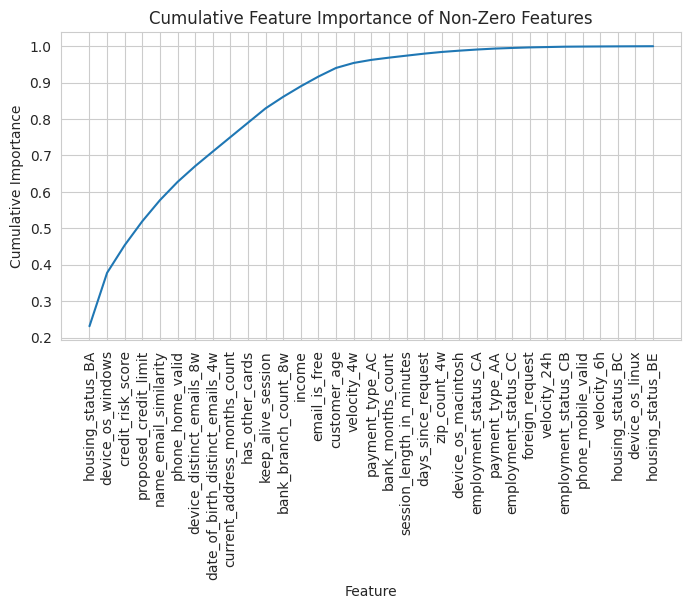

In [83]:
# Assuming 'importances' is already defined as the array of feature importances
feature_names = X_train.columns

# Sort features by their importance
sorted_idx = np.argsort(importances)[::-1]
sorted_feature_importances = importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Calculate cumulative feature importance
cumulative_importances = np.cumsum(sorted_feature_importances)

# Filter out features with zero importance
non_zero_indices = sorted_feature_importances > 0
filtered_feature_names = sorted_feature_names[non_zero_indices]
filtered_cumulative_importances = cumulative_importances[non_zero_indices]

# Create a DataFrame for plotting
importance_data = pd.DataFrame({
    'Feature': filtered_feature_names,
    'Cumulative Importance': filtered_cumulative_importances
})

# Plotting using Seaborn
plt.figure(figsize=(8, 4))
sns.lineplot(data=importance_data, x='Feature', y='Cumulative Importance')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.title('Cumulative Feature Importance of Non-Zero Features')
plt.show()

**Stratified K-Fold Cross-Validation:**
Given the imbalanced nature of the data, use Stratified K-Fold cross-validation. This method ensures that each fold maintains the percentage of samples for each class as in the whole dataset.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.base import clone
from tqdm import tqdm

def find_best_n_features(X, y, n_values):
    scores = []
    sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

    for n in tqdm(n_values, desc='Evaluating feature sets'):
        fold_scores = []
        selected_features = sorted_feature_names[:n]
        X_selected = X[selected_features]

        for train_index, test_index in sss.split(X_selected, y):
            X_train_fold, X_test_fold = X_selected.iloc[train_index], X_selected.iloc[test_index]
            y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

            model = clone(gb_classifier)
            model.fit(X_train_fold, y_train_fold)
            y_pred_fold = model.predict_proba(X_test_fold)[:, 1]
            fold_scores.append(roc_auc_score(y_test_fold, y_pred_fold))

        scores.append(np.mean(fold_scores))

    best_n = n_values[np.argmax(scores)]
    return best_n, scores

# Testing different values of N
n_values = range(1, len(filtered_feature_names) + 1)
best_n, scores = find_best_n_features(X_train, y_train, n_values)

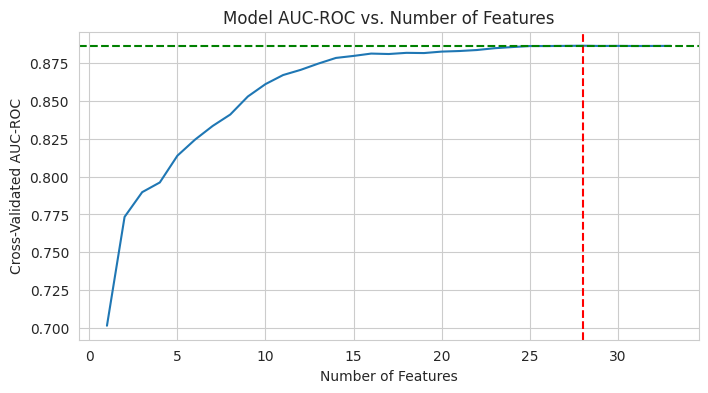

Best number of features: 28


In [81]:
# Plotting the results
plt.figure(figsize=(8, 4))
sns.lineplot(x=list(n_values), y=scores)
plt.axvline(x=best_n, color='red', linestyle='--')
plt.axhline(y=scores[best_n-1], color='green', linestyle='--')
plt.title('Model AUC-ROC vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated AUC-ROC')
plt.show()

# Print the optimal number of features
print("Best number of features:", best_n)

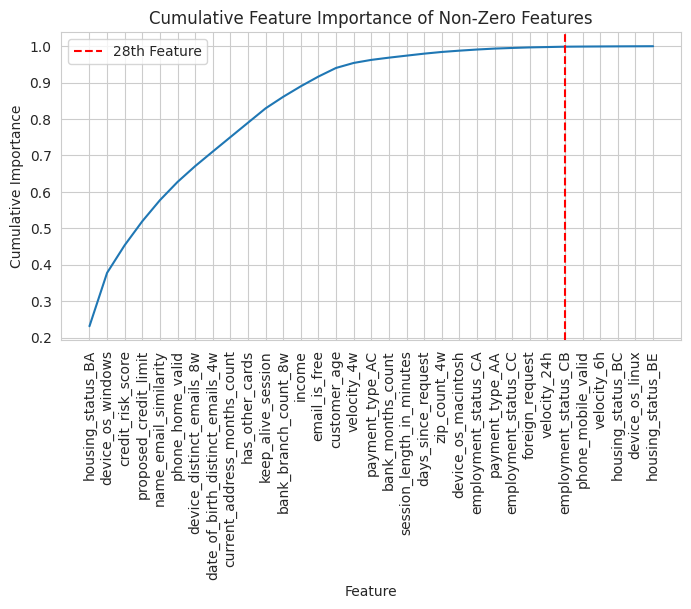

In [82]:
# Create a DataFrame for plotting
importance_data = pd.DataFrame({
    'Feature': filtered_feature_names,
    'Cumulative Importance': filtered_cumulative_importances
})

# Plotting using Seaborn
plt.figure(figsize=(8, 4))
sns.lineplot(data=importance_data, x='Feature', y='Cumulative Importance')
plt.xticks(rotation=90)  # Rotate the x labels for better readability

# Check if there are at least 28 features, and if so, add a vertical line at the 28th feature
if len(filtered_feature_names) >= 28:
    plt.axvline(x=27, color='red', linestyle='--', label='28th Feature')  # 27 because of zero-indexing

plt.legend()
plt.title('Cumulative Feature Importance of Non-Zero Features')
plt.show()

In [ ]:
# Save importance_df to csv file
importance_df.to_csv('importance_df.csv', index=False)

In [ ]:
# Create a model for feature selection
selector = SelectFromModel(gb_classifier, prefit=True)

# Get the boolean mask indicating which features are selected
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_mask]

# Print the names of the selected features
print(selected_feature_names)

Index(['income', 'name_email_similarity', 'current_address_months_count',
       'customer_age', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'has_other_cards',
       'proposed_credit_limit', 'keep_alive_session',
       'device_distinct_emails_8w', 'housing_status_BA', 'device_os_windows'],
      dtype='object')


**Feature Selection:**

When we find that one category (e.g., housing_status_BA) within a set of dummy variables derived from the same original categorical variable (in this case: housing_status) is highly important in your Gradient Boosting model, it doesn't necessarily mean we should discard the other dummy variables.

However, each dummy variable represents a unique category of the original feature. Removing other dummy variables while keeping one can lead to a loss of information. Models shoud use these variables in combination to make predictions. **So, we will still keep relevant dummy variables in the dataset.**

In [ ]:
# Selected features (25 features in total) should be:
selected_features = ['income',
                     'name_email_similarity',
                     'current_address_months_count',
                     'customer_age',
                     'bank_branch_count_8w',
                     'date_of_birth_distinct_emails_4w',
                     'credit_risk_score',
                     'email_is_free',
                     'phone_home_valid',
                     'has_other_cards',
                     'proposed_credit_limit',
                     'keep_alive_session',
                     'device_distinct_emails_8w',
                     'housing_status_BA',
                     'device_os_windows',
                     'device_os_macintosh',
                     'housing_status_BC',
                     'housing_status_BD',
                     'device_os_other',
                     'device_os_linux',
                     'housing_status_BG',
                     'housing_status_BF',
                     'housing_status_BE',
                     'housing_status_BB',
                     'device_os_x11']

In [ ]:
# Orgnize the train and test dataframe
train_df = train_df[['fraud_bool'] + selected_features].reset_index(drop=True)
test_df = test_df[['fraud_bool'] + selected_features].reset_index(drop=True)

In [ ]:
# Save train_df and test_df to csv file.
# We will use the following two files to train Machine Learning Models
train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

## Feature Selection in Resamping Dataset

In [ ]:
# Load df_scaled
df_scaled = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AML_Final_Project/df_scaled.csv')
df_scaled.head(5)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,-1.131225,0.011765,50,-0.185992,-0.800179,1.655654,-1.106207,-1.080405,-0.399472,-0.695634,0.773925,0,1,0,9.167084e-01,0,-0.033406,0,1,-0.457082,0,1.0,7,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0.9,-0.683485,0.645170,50,-0.188886,-1.200915,-1.705962,-1.419569,-1.884702,1.158426,-1.291591,1.835353,1,0,0,1.334122e-02,0,2.016575,0,1,3.019486,0,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0.9,-1.552624,0.509440,40,0.390135,-0.699746,-0.538157,-1.268972,-1.846310,-0.399472,0.893585,0.659176,1,0,1,3.566006e-16,0,-0.648400,0,1,-0.352378,0,1.0,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0.9,-1.156530,-0.734748,50,-0.186336,-0.759409,-0.734693,-0.483685,-1.995702,3.772305,-0.695634,-0.301847,1,0,1,1.619327e+00,1,-0.648400,0,1,-0.686299,0,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0.9,0.354526,1.482170,50,-0.189068,-0.679859,-0.215242,-1.380808,-1.924547,3.922228,-1.490243,2.351723,1,1,0,1.619327e+00,0,2.016575,0,1,-0.471143,1,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Split the data into training and testing sets
train_df = df_scaled[df_scaled['month'].between(0, 5)]
test_df = df_scaled[df_scaled['month'].between(6, 7)]

# Then drop the 'month' column from the dataset
train_df = train_df.drop(columns=['month'])
test_df = test_df.drop(columns=['month'])

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target in training data
X_train = train_df.drop('fraud_bool', axis=1)
y_train = train_df['fraud_bool']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine the resampled training target and features into a new DataFrame
# Ensuring 'fraud_bool' is the first column
train_df_resampled = pd.concat([pd.DataFrame(y_train_resampled, columns=['fraud_bool']), pd.DataFrame(X_train_resampled, columns=X_train.columns)], axis=1)
train_df_resampled.shape

(1564416, 48)

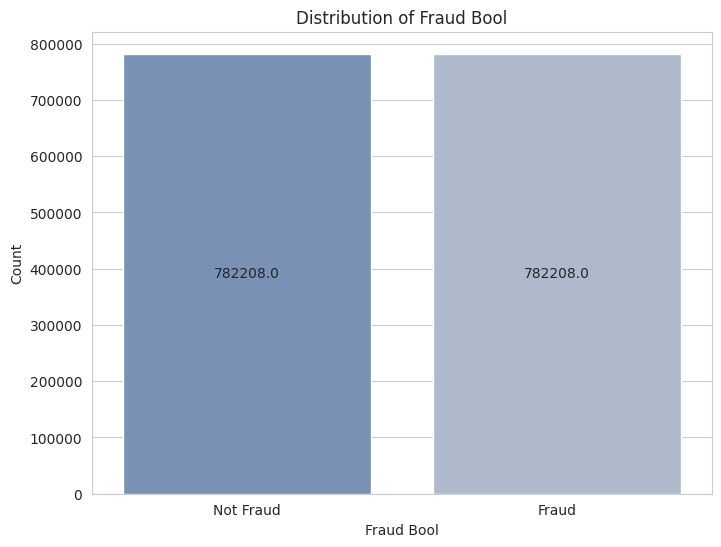

In [ ]:
# Create a count plot
# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fraud_bool', data=train_df_resampled, palette=my_palette)
plt.title('Distribution of Fraud Bool')
plt.xlabel('Fraud Bool')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])

# Annotate the bars with the count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center')

plt.show()

In [ ]:
# Feature selection using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

# Separate features and target variable for training data
X_train = train_df_resampled.drop(columns=['fraud_bool'])
y_train = train_df_resampled['fraud_bool']

# Initialize and train the classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Get feature importances
importances = gb_classifier.feature_importances_

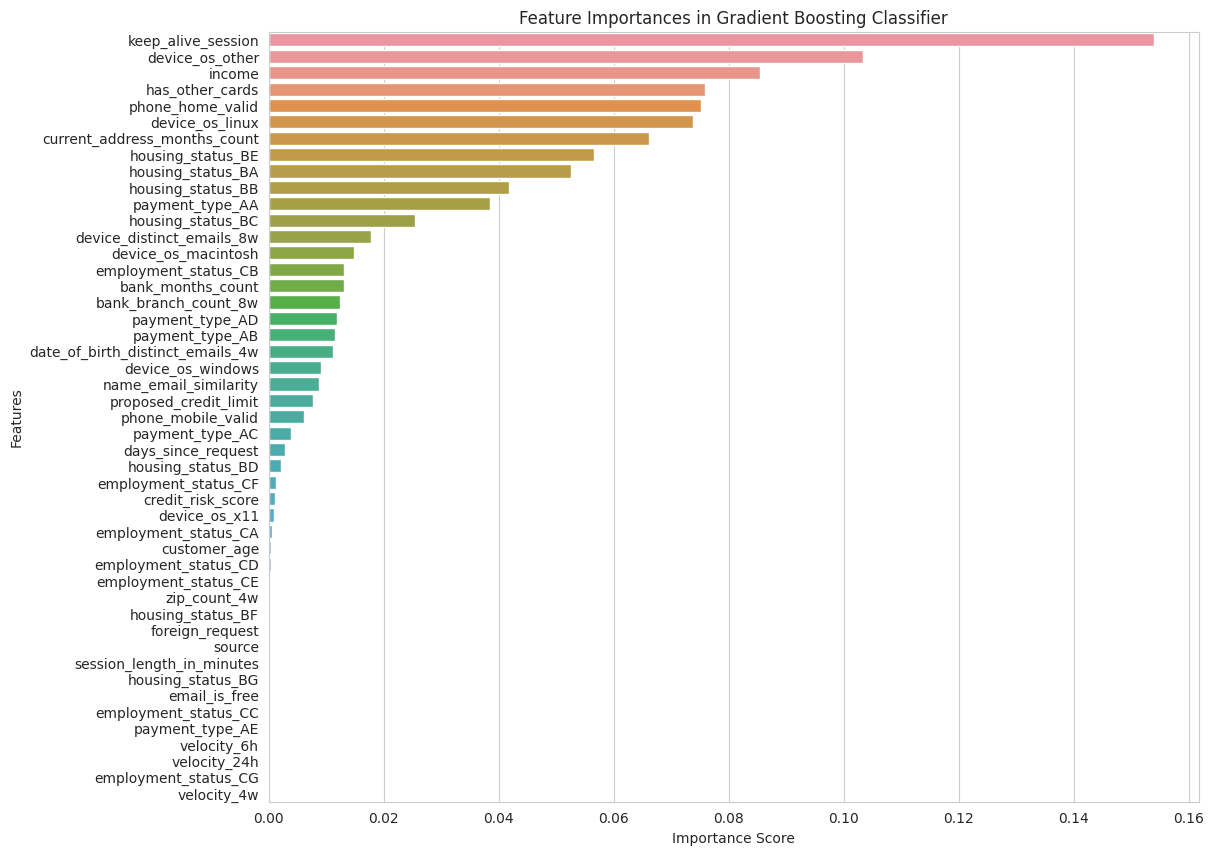

In [ ]:
# Visualize the importance of features
# Generate a dataframe to store Importance data
features = X_train.columns
importance_dict = {'Feature': features, 'Importance': importances}
importance_df = pd.DataFrame(importance_dict)

# Sort the DataFrame based on the importance scores
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create the Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# Save importance_df to csv file
importance_df.to_csv('importance_df_resampled.csv', index=False)

In [ ]:
# Create a model for feature selection
selector = SelectFromModel(gb_classifier, prefit=True)

# Get the boolean mask indicating which features are selected
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_mask]

# Print the names of the selected features
print(selected_feature_names)

Index(['income', 'current_address_months_count', 'phone_home_valid',
       'has_other_cards', 'keep_alive_session', 'payment_type_AA',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BE', 'device_os_linux', 'device_os_other'],
      dtype='object')


In [ ]:
# Selected features (22 features in total) should be:
selected_features_resampled = ['keep_alive_session',
                               'device_os_other',
                               'income',
                               'has_other_cards',
                               'phone_home_valid',
                               'device_os_linux',
                               'current_address_months_count',
                               'housing_status_BE',
                               'housing_status_BA',
                               'housing_status_BB',
                               'payment_type_AA',
                               'housing_status_BC',
                               'device_os_macintosh',
                               'payment_type_AD',
                               'payment_type_AB',
                               'device_os_windows',
                               'payment_type_AC',
                               'housing_status_BD',
                               'device_os_x11',
                               'housing_status_BF',
                               'housing_status_BG',
                               'payment_type_AE']

In [ ]:
# Orgnize the train and test dataframe
train_df_resampled = train_df_resampled[['fraud_bool'] + selected_features_resampled].reset_index(drop=True)
test_df_resampled = test_df[['fraud_bool'] + selected_features_resampled].reset_index(drop=True)

In [ ]:
# Save train_df_resampled and test_df_resampled to csv file.
# We will use the following two files to train Machine Learning Models
train_df_resampled.to_csv('train_df_resampled.csv', index=False)
test_df_resampled.to_csv('test_df_resampled.csv', index=False)

In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, roc_auc_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns

In [2]:
df_train = pd.read_csv('train_df.csv')
df_train.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,...,session_length_in_minutes,employment_status_CA,payment_type_AC,days_since_request,zip_count_4w,payment_type_AA,employment_status_CC,foreign_request,velocity_24h,employment_status_CB
0,1,0.8,-1.177629,0.204049,30,-0.401645,-0.496982,-0.416596,1,0,...,-0.454145,1,1,-0.189250,0.204147,0,0,0,-1.145384,0
1,1,0.8,-0.178005,0.226670,40,-0.399472,-0.695634,1.950102,1,1,...,2.010287,0,1,-0.185954,-0.376572,0,1,0,0.689709,0
2,1,0.9,-0.572665,-0.090032,70,-0.399472,-1.490243,1.993133,1,0,...,-0.592129,1,1,-0.188197,-0.724606,0,0,0,0.772231,0
3,1,0.7,-1.591191,-0.666883,30,-0.369053,2.681455,1.534137,1,0,...,-0.285895,1,0,-0.189018,0.122608,0,0,0,0.496985,0
4,1,0.9,-1.187201,0.871386,40,-0.397299,-0.695634,2.638595,1,0,...,-0.227782,0,0,-0.187616,-0.099139,0,0,0,0.108526,1


In [3]:
df_test = pd.read_csv('test_df.csv')
df_test.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,...,session_length_in_minutes,employment_status_CA,payment_type_AC,days_since_request,zip_count_4w,payment_type_AA,employment_status_CC,foreign_request,velocity_24h,employment_status_CB
0,1,0.9,-1.131225,0.011765,50,-0.399472,-0.695634,0.773925,0,1,...,-0.457082,1,0,-0.185992,-0.800179,1,0,0,-1.106207,0
1,1,0.9,-0.683485,0.645170,50,1.158426,-1.291591,1.835353,1,0,...,3.019486,1,0,-0.188886,-1.200915,0,0,0,-1.419569,0
2,1,0.9,-1.552624,0.509440,40,-0.399472,0.893585,0.659176,1,0,...,-0.352378,0,1,0.390135,-0.699746,0,0,0,-1.268972,1
3,1,0.9,-1.156530,-0.734748,50,3.772305,-0.695634,-0.301847,1,0,...,-0.686299,1,0,-0.186336,-0.759409,0,0,0,-0.483685,0
4,1,0.9,0.354526,1.482170,50,3.922228,-1.490243,2.351723,1,1,...,-0.471143,1,0,-0.189068,-0.679859,0,0,0,-1.380808,0


In [4]:
df_train_rs = pd.read_csv('train_df_resampled.csv')
df_train_rs.head()

,fraud_bool,keep_alive_session,device_os_other,income,has_other_cards,phone_home_valid,device_os_linux,current_address_months_count,housing_status_BE,housing_status_BA,...,bank_branch_count_8w,employment_status_CB,employment_status_CF,employment_status_CA,employment_status_CD,employment_status_CE,date_of_birth_distinct_emails_4w,name_email_similarity,proposed_credit_limit,phone_mobile_valid
0,1,0,0,0.8,0,0,1,0.204049,0,1,...,-0.401645,0,0,1,0,0,-0.496982,-1.177629,-0.648400,1
1,1,0,1,0.8,0,1,0,0.226670,0,1,...,-0.399472,0,0,0,0,0,-0.695634,-0.178005,-0.648400,1
2,1,0,0,0.9,0,0,0,-0.090032,0,1,...,-0.399472,0,0,1,0,0,-1.490243,-0.572665,3.041565,1
3,1,1,0,0.7,0,0,0,-0.666883,0,0,...,-0.369053,0,0,1,0,0,2.681455,-1.591191,0.991584,1
4,1,0,0,0.9,0,0,0,0.871386,0,1,...,-0.397299,1,0,0,0,0,-0.695634,-1.187201,2.016575,1


In [5]:
df_test_rs = pd.read_csv('test_df_resampled.csv')
df_test_rs.head()

,fraud_bool,keep_alive_session,device_os_other,income,has_other_cards,phone_home_valid,device_os_linux,current_address_months_count,housing_status_BE,housing_status_BA,...,bank_branch_count_8w,employment_status_CB,employment_status_CF,employment_status_CA,employment_status_CD,employment_status_CE,date_of_birth_distinct_emails_4w,name_email_similarity,proposed_credit_limit,phone_mobile_valid
0,1,0,0,0.9,0,1,0,0.011765,0,1,...,-0.399472,0,0,1,0,0,-0.695634,-1.131225,-0.033406,0
1,1,0,0,0.9,0,0,0,0.645170,0,1,...,1.158426,0,0,1,0,0,-1.291591,-0.683485,2.016575,0
2,1,0,1,0.9,0,0,0,0.509440,0,1,...,-0.399472,1,0,0,0,0,0.893585,-1.552624,-0.648400,1
3,1,0,0,0.9,1,0,1,-0.734748,0,1,...,3.772305,0,0,1,0,0,-0.695634,-1.156530,-0.648400,1
4,1,1,0,0.9,0,1,0,1.482170,0,1,...,3.922228,0,0,1,0,0,-1.490243,0.354526,2.016575,0


In [6]:
# Feature selection results
unimportant_features = [
    "phone_home_valid",
    "current_address_months_count",
    "has_other_cards",
    "bank_branch_count_8w",
    "income",
    "customer_age",
    "velocity_4w",
    "payment_type_AC",
    "zip_count_4w",
    "employment_status_CA",
    "payment_type_AA",
    "employment_status_CC",
    "device_os_linux",
]

In [7]:
from sklearn.preprocessing import StandardScaler

# Preparing data for modeling
y_train = df_train['fraud_bool']
y_test = df_test['fraud_bool']

X_train = df_train.drop('fraud_bool', axis=1)
X_test = df_test.drop('fraud_bool', axis=1)
X_train = X_train.drop(unimportant_features, axis=1)
X_test = X_test.drop(unimportant_features, axis=1)

# Scaling the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scaling the test data
X_test_scaled = scaler.transform(X_test)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [8]:
# For resampled data

# Preparing data for modeling
y_train_rs = df_train_rs['fraud_bool']
y_test_rs = df_test_rs['fraud_bool']

unimportant_features_rs = list(set(unimportant_features) - set(['customer_age', 'velocity_4w', 'zip_count_4w', 'employment_status_CC']))

X_train_rs = df_train_rs.drop('fraud_bool', axis=1)
X_test_rs = df_test_rs.drop('fraud_bool', axis=1)
X_train_rs = X_train_rs.drop(unimportant_features_rs, axis=1)
X_test_rs = X_test_rs.drop(unimportant_features_rs, axis=1)

# Scaling the training data
scaler = StandardScaler()
X_train_scaled_rs = scaler.fit_transform(X_train_rs)

# Scaling the test data
X_test_scaled_rs = scaler.transform(X_test_rs)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


# 1. Modeling on Original Dataset

## Decision Tree

In [9]:
# Defining the Decision Tree Classifier model
tree_model = DecisionTreeClassifier()

In [10]:
# Use cross-validation to get the best tree model parameters

# Define a range of hyperparameters
param_grid = {
    'max_depth': [1,2,3,5,10],
}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 1}


In [11]:
# Fitting the Decision Tree model on the training data with optimal parameters
tree_model = DecisionTreeClassifier(max_depth=1)

# Fit the model to your training data
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=1)

In [12]:
n_nodes = tree_model.tree_.node_count

print(f"Number of nodes in the tree: {n_nodes}")

Number of nodes in the tree: 3


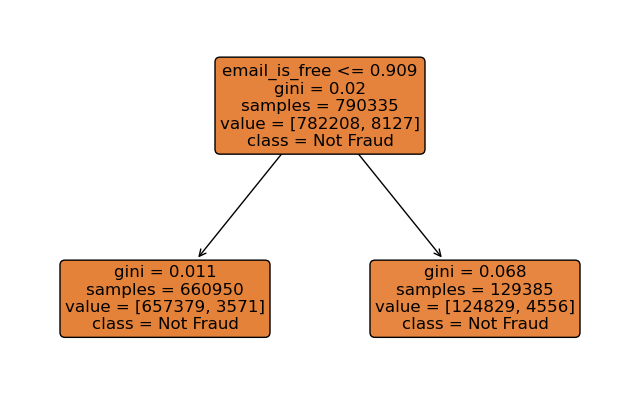

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8,5))
plot_tree(tree_model,
          filled=True,
          rounded=True,
          fontsize=12,
          class_names=["Not Fraud", "Fraud"],
          feature_names=df_train.drop('fraud_bool', axis=1).columns)
plt.show()

In [14]:
# Making predictions using the trained model on the test data
tree_predictions = tree_model.predict(X_test_scaled)

In [15]:
# Generating the confusion matrix to evaluate the model's prediction accuracy
cm_tree = confusion_matrix(y_test, tree_predictions)
print("Confusion Matrix for Decision Tree:\n", cm_tree)

Confusion Matrix for Decision Tree:
 [[200404      0]
 [  2868      0]]


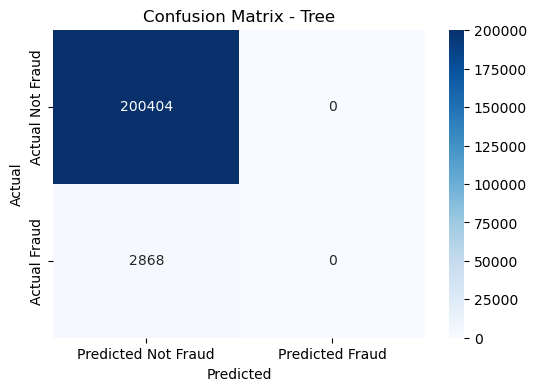

In [16]:
# cm_log_reg_rs is your confusion matrix
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(cm_tree, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],  # Replace with your class names
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])        # Replace with your class names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Tree')
plt.show()

In [17]:
# Extracting the elements from the confusion matrix
TP = cm_tree[0, 0]
FN = cm_tree[0, 1]
FP = cm_tree[1, 0]
TN = cm_tree[1, 1]

# Calculating Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculating Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (TP + FN)

# Calculating Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Print the calculated values
print("Type 1 Error Rate:", type_1_error_rate)
print("Type 2 Error Rate:", type_2_error_rate)
print("Specificity:", specificity)

Type 1 Error Rate: 1.0
Type 2 Error Rate: 0.0
Specificity: 0.0


In [18]:
# Creating a classification report to assess various accuracy metrics
report_tree = classification_report(y_test, tree_predictions)
print("Classification Report for Decision Tree:\n", report_tree)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    200404
           1       0.00      0.00      0.00      2868

    accuracy                           0.99    203272
   macro avg       0.49      0.50      0.50    203272
weighted avg       0.97      0.99      0.98    203272



C:\Users\Sai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


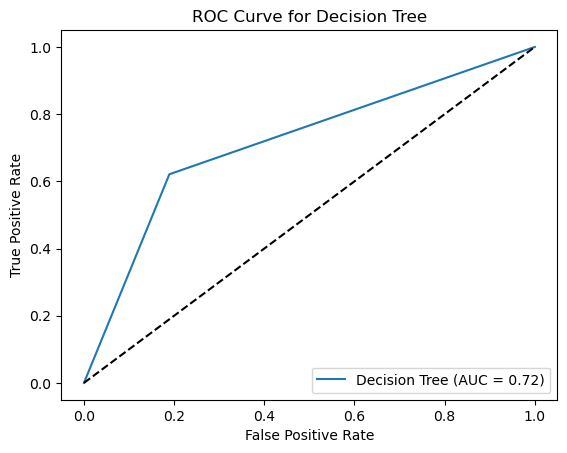

In [19]:
# Plotting the ROC Curve and calculating the Area Under the Curve (AUC)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree_model.predict_proba(X_test_scaled)[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure()
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Random Forest


In [20]:
# Defining the Random Forest Classifier model
rf_model = RandomForestClassifier()

In [21]:
# Fitting the Random Forest model on the training data
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3)

In [22]:
# After fitting the model
rf_params = rf_model.get_params()

# The number of estimators
n_estimators = rf_params['n_estimators']

# Print the number of estimators
print("Number of estimators:", n_estimators)

# Print all parameters
print("Model parameters:", rf_params)

Number of estimators: 100
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [23]:
# Making predictions using the trained model on the test data
rf_predictions = rf_model.predict(X_test_scaled)

In [24]:
# Generating a confusion matrix to evaluate the model's prediction accuracy
cm_rf = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:\n", cm_rf)

Confusion Matrix for Random Forest:
 [[200404      0]
 [  2868      0]]


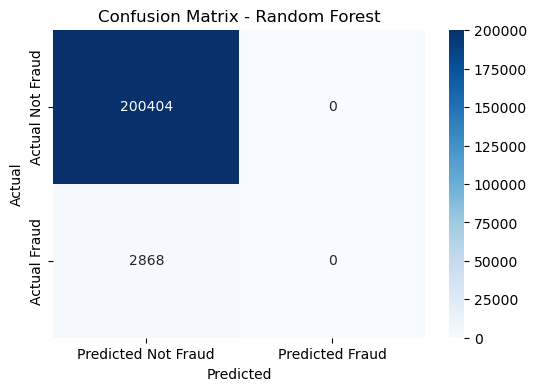

In [25]:
# cm_log_reg_rs is your confusion matrix
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],  # Replace with your class names
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])        # Replace with your class names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [26]:
# Creating a classification report to assess various accuracy metrics
report_rf = classification_report(y_test, rf_predictions)
print("Classification Report for Random Forest:\n", report_rf)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    200404
           1       0.00      0.00      0.00      2868

    accuracy                           0.99    203272
   macro avg       0.49      0.50      0.50    203272
weighted avg       0.97      0.99      0.98    203272



C:\Users\Sai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


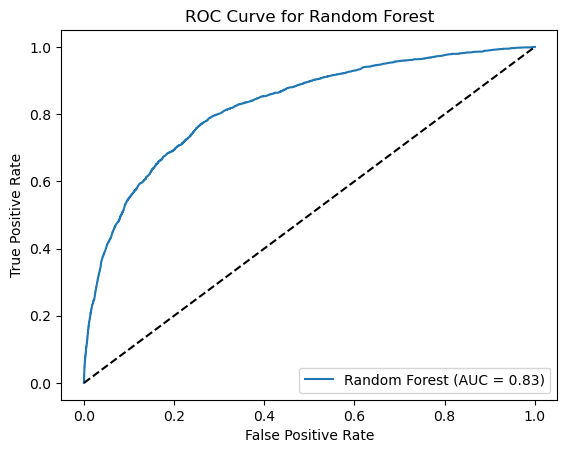

In [27]:
# Plotting the ROC Curve and calculating the Area Under the Curve (AUC)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# 2. Modeling on Resampled Dataset


## Decision Tree

In [28]:
# Defining the Decision Tree Classifier model
tree_model_rs = DecisionTreeClassifier(max_depth=1)

In [29]:
# Fitting the Decision Tree model on the training data
tree_model_rs.fit(X_train_scaled_rs, y_train_rs)

DecisionTreeClassifier(max_depth=1)

In [30]:
# Making predictions using the trained model on the test data
tree_predictions_rs = tree_model_rs.predict(X_test_scaled_rs)

In [31]:
# Generating the confusion matrix to evaluate the model's prediction accuracy
cm_tree_rs = confusion_matrix(y_test_rs, tree_predictions_rs)
print("Confusion Matrix for Decision Tree:\n", cm_tree_rs)

Confusion Matrix for Decision Tree:
 [[122611  77793]
 [  1035   1833]]


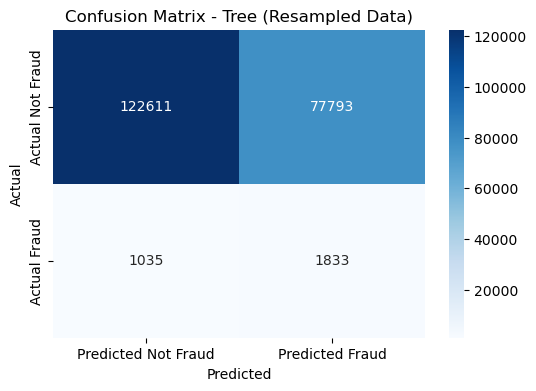

In [32]:
# cm_log_reg_rs is your confusion matrix
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(cm_tree_rs, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],  # Replace with your class names
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])        # Replace with your class names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Tree (Resampled Data)')
plt.show()

In [33]:
# Extracting the elements from the confusion matrix
TP = cm_tree_rs[0, 0]
FN = cm_tree_rs[0, 1]
FP = cm_tree_rs[1, 0]
TN = cm_tree_rs[1, 1]

# Calculating Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculating Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (TP + FN)

# Calculating Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Print the calculated values
print("Type 1 Error Rate:", type_1_error_rate)
print("Type 2 Error Rate:", type_2_error_rate)
print("Specificity:", specificity)

Type 1 Error Rate: 0.3608786610878661
Type 2 Error Rate: 0.38818087463324086
Specificity: 0.6391213389121339


In [34]:
# Creating a classification report to assess various accuracy metrics
report_tree_rs = classification_report(y_test_rs, tree_predictions_rs)
print("Classification Report for Decision Tree:\n", report_tree_rs)

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.61      0.76    200404
           1       0.02      0.64      0.04      2868

    accuracy                           0.61    203272
   macro avg       0.51      0.63      0.40    203272
weighted avg       0.98      0.61      0.75    203272



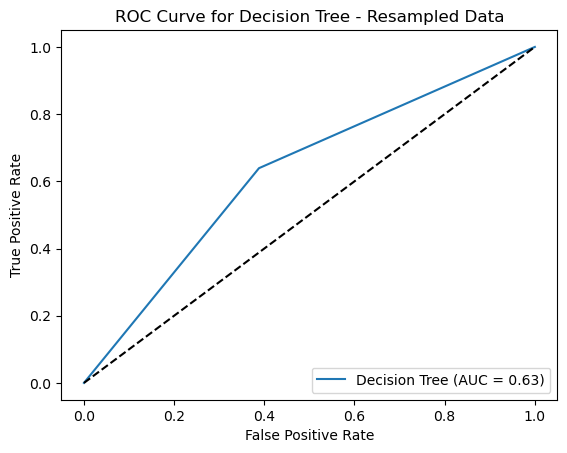

In [35]:
# Plotting the ROC Curve and calculating the Area Under the Curve (AUC)
fpr_tree_rs, tpr_tree_rs, thresholds_tree_rs = roc_curve(y_test_rs, tree_model_rs.predict_proba(X_test_scaled_rs)[:,1])
roc_auc_tree_rs = auc(fpr_tree_rs, tpr_tree_rs)

plt.figure()
plt.plot(fpr_tree_rs, tpr_tree_rs, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree_rs)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree - Resampled Data')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [36]:
# Defining the Random Forest Classifier model
rf_model_rs = RandomForestClassifier(n_estimators=100, max_depth=3)

In [37]:
# Fitting the Random Forest model on the training data
rf_model_rs.fit(X_train_scaled_rs, y_train_rs)

RandomForestClassifier(max_depth=3)

In [38]:
# Making predictions using the trained model on the test data
rf_predictions_rs = rf_model_rs.predict(X_test_scaled_rs)

In [39]:
# Generating a confusion matrix to evaluate the model's prediction accuracy
cm_rf_rs = confusion_matrix(y_test_rs, rf_predictions_rs)
print("Confusion Matrix for Random Forest:\n", cm_rf_rs)

Confusion Matrix for Random Forest:
 [[162510  37894]
 [   959   1909]]


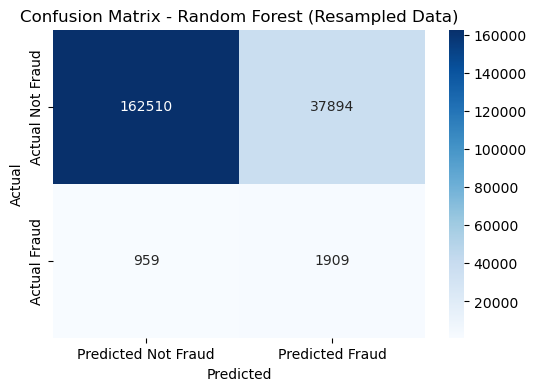

In [40]:
# cm_log_reg_rs is your confusion matrix
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(cm_rf_rs, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],  # Replace with your class names
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])        # Replace with your class names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest (Resampled Data)')
plt.show()

In [41]:
# Creating a classification report to assess various accuracy metrics
report_rf_rs = classification_report(y_test_rs, rf_predictions_rs)
print("Classification Report for Random Forest:\n", report_rf_rs)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89    200404
           1       0.05      0.67      0.09      2868

    accuracy                           0.81    203272
   macro avg       0.52      0.74      0.49    203272
weighted avg       0.98      0.81      0.88    203272



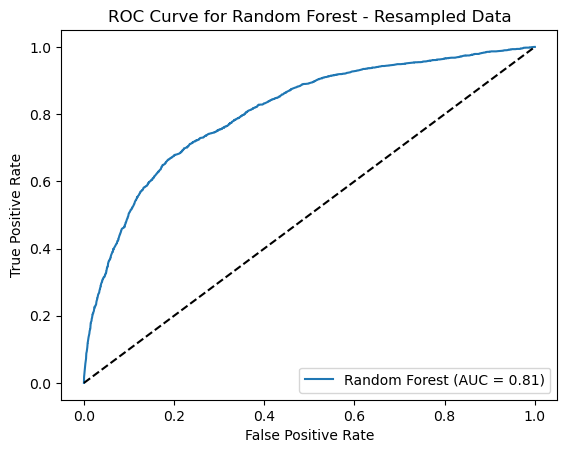

In [42]:
# Plotting the ROC Curve and calculating the Area Under the Curve (AUC)
fpr_rf_rs, tpr_rf_rs, thresholds_rf_rs = roc_curve(y_test_rs, rf_model_rs.predict_proba(X_test_scaled_rs)[:,1])
roc_auc_rf_rs = auc(fpr_rf_rs, tpr_rf_rs)

plt.figure()
plt.plot(fpr_rf_rs, tpr_rf_rs, label='Random Forest (AUC = %0.2f)' % roc_auc_rf_rs)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest - Resampled Data')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [43]:
test_df = pd.read_csv('test_df.csv')
test_df_resampled = pd.read_csv('test_df_resampled.csv')
train_df = pd.read_csv('train_df.csv')
train_df_resampled = pd.read_csv('train_df_resampled.csv')

In [44]:
X_train = train_df_resampled.drop('fraud_bool', axis = 1)
X_test = test_df_resampled.drop('fraud_bool', axis = 1)

y_train = train_df_resampled[['fraud_bool']]
y_test = test_df_resampled[['fraud_bool']]

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

LogisticRegression()

In [46]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Accuracy of logistic regression classifier on test set: 0.94


In [47]:
preds = pd.DataFrame()
preds['y_pred'] = y_pred
preds['y_test'] = y_test

In [48]:
preds['conf'] = 0
preds['conf'] = np.where((preds['y_pred'] == 0) & (preds['y_test'] == 0), 4, preds['conf']) #TN
preds['conf'] = np.where((preds['y_pred'] == 1) & (preds['y_test'] == 1), 3, preds['conf']) #TP
preds['conf'] = np.where((preds['y_pred'] == 1) & (preds['y_test'] == 0), 2, preds['conf']) #FP
preds['conf'] = np.where((preds['y_pred'] == 0) & (preds['y_test'] == 1), 1, preds['conf']) #FN

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(preds['y_test'], preds['y_pred'])
print(confusion_matrix)

[[189554  10850]
 [  1579   1289]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    200404
           1       0.11      0.45      0.17      2868

    accuracy                           0.94    203272
   macro avg       0.55      0.70      0.57    203272
weighted avg       0.98      0.94      0.96    203272



C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

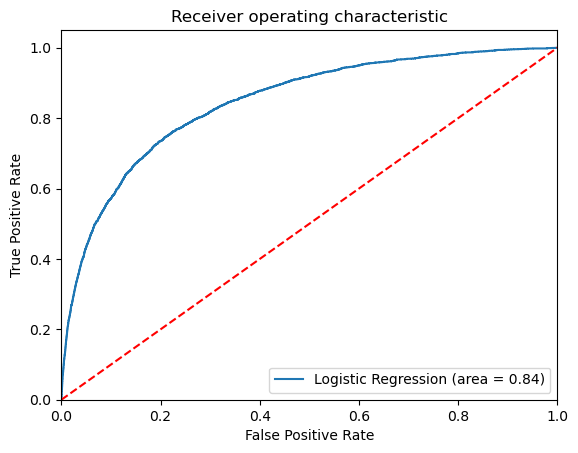

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_proba = logreg.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### XGBoost Classifier

In [52]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Sai\anacon

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
predictions = model.predict(X_test)

C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [54]:
preds = pd.DataFrame()
preds['y_pred'] = predictions
preds['y_test'] = y_test

In [55]:
preds['conf'] = 0
preds['conf'] = np.where((preds['y_pred'] == 0) & (preds['y_test'] == 0), 4, preds['conf']) #TN
preds['conf'] = np.where((preds['y_pred'] == 1) & (preds['y_test'] == 1), 3, preds['conf']) #TP
preds['conf'] = np.where((preds['y_pred'] == 1) & (preds['y_test'] == 0), 2, preds['conf']) #FP
preds['conf'] = np.where((preds['y_pred'] == 0) & (preds['y_test'] == 1), 1, preds['conf']) #FN
preds['conf'].value_counts()

conf
4    200084
1      2700
2       320
3       168
Name: count, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(preds['y_test'], preds['y_pred'])
print(confusion_matrix)

[[200084    320]
 [  2700    168]]


C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Sai\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Sai\anacon

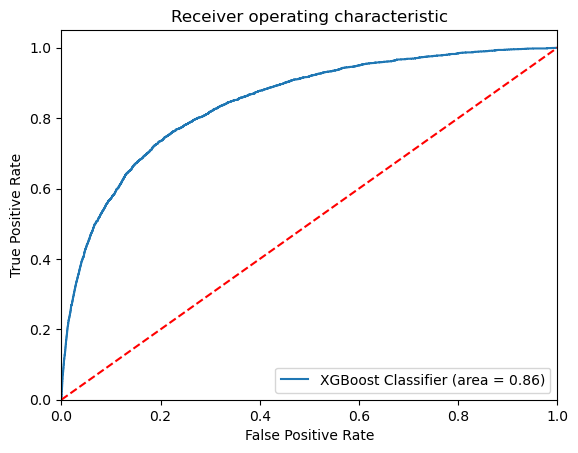

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()